In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
from copy import copy

In [2]:
file_path = 'data//avito_new_data_for_dano.xlsx'

data = pd.read_excel(file_path)
data['CTR'] = data['page_views']

df = data

D:\Программы\Temp\Temp\ipykernel_18928\1898620414.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_line('age', 'CTR', 'CTR от возраста животного (Собаки)', 'Возраст (месяцы)', 'CTR', df[df['category'] == 'Собаки'][df['breed'].isna()])


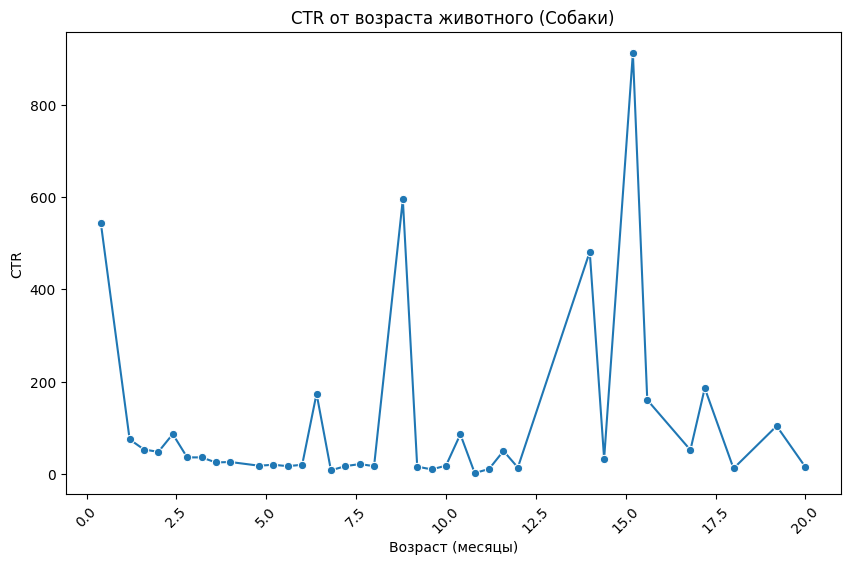

D:\Программы\Temp\Temp\ipykernel_18928\1898620414.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_line('age', 'CTR', 'CTR от возраста животного (Кошки)', 'Возраст (месяцы)', 'CTR', df[df['category'] == 'Кошки'][df['breed'].isna()])


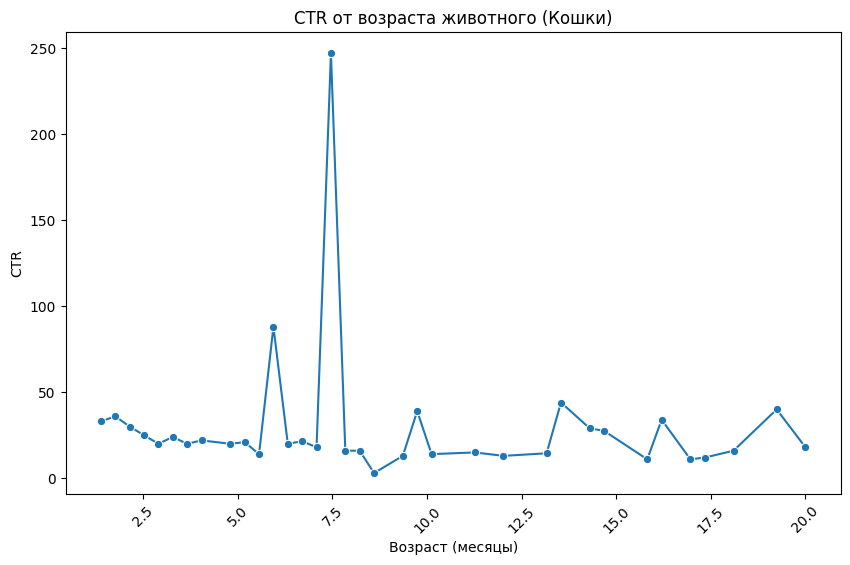

In [40]:
# Удаление NaN значений
df = df.dropna(subset=['category', 'age', 'description_length', 'CTR'])
df['age'] = df['age'].clip(upper=20)


def plot_line(x, y, title, xlabel, ylabel, df=df):

    # Создание интервалов для оси X
    df['x_bins'] = list(map(lambda x: x.right, pd.cut(df[x], bins=50)))  # Разбиваем на интервалы
    # Вычисление среднего значения Y для каждого интервала
    median_data = df.groupby('x_bins')[y].median().reset_index()  # Группировка и расчет среднего
    median_data = median_data.dropna()

    # Проверка на наличие данных в median_data
    if median_data.empty:
        print("Нет данных для построения графика.")
        return

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=median_data, x='x_bins', y=y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
    plt.show()


plot_line('age', 'CTR', 'CTR от возраста животного (Собаки)', 'Возраст (месяцы)', 'CTR', df[df['category'] == 'Собаки'][df['breed'].isna()])
plot_line('age', 'CTR', 'CTR от возраста животного (Кошки)', 'Возраст (месяцы)', 'CTR', df[df['category'] == 'Кошки'][df['breed'].isna()])